In [62]:
%run ./draw.py

In [63]:
aOrigin = np.array([
    [2, 1],
    [5, 1],
    [5, 3],
    [2, 3],
    [0, 0]
])
bOrigin = np.array([
    [-2, 3],
    [-4, 3],
    [-4, 4],
    [-2, 4],
    [0, 0]
])

aPosOrigin = np.array([3.5, 2])
bPosOrigin = np.array([-3, 3.5])

ahOrigin = np.array([2.5, 1])
bhOrigin = np.array([1, 0.5])

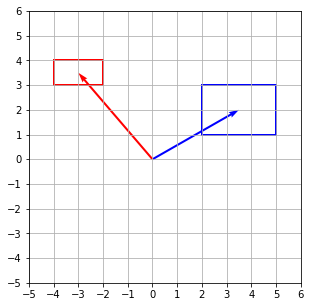

In [64]:
draw = Draw()
draw.rect(aOrigin, 'b')
draw.rect(bOrigin)
draw.v(aPosOrigin, 'b')
draw.v(bPosOrigin)
draw.render([-5, 7])

In [65]:
rotateA = np.array([
    [math.cos(math.pi / 180 * 40), math.sin(math.pi / 180 * 40) * -1],
    [math.sin(math.pi / 180 * 40), math.cos(math.pi / 180 * 40)]
])

rotateB = np.array([
    [math.cos(math.pi / 180 * 90), math.sin(math.pi / 180 * 90) * -1],
    [math.sin(math.pi / 180 * 90), math.cos(math.pi / 180 * 90)]
])

iRotateA = np.linalg.inv(rotateA)
iRotateB = np.linalg.inv(rotateB)

In [66]:
a = np.array([rotateA.dot(item) for item in aOrigin])
b = np.array([rotateB.dot(item) for item in bOrigin])
aPos = rotateA.dot(aPosOrigin)
bPos = rotateB.dot(bPosOrigin)
ah = np.array([abs(item) for item in rotateA.dot(ahOrigin)])
bh = np.array([abs(item) for item in rotateB.dot(bhOrigin)]) 

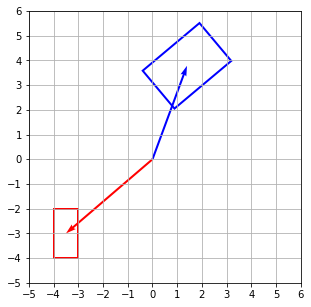

In [67]:
# 两个矩形初始状态
draw = Draw()
draw.rect(a, 'b')
draw.rect(b)
draw.v(aPos, 'b')
draw.v(bPos)
draw.render([-5, 7])

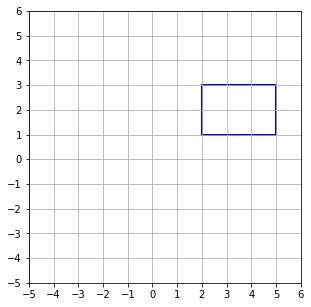

In [68]:
# 将坐标系转变为已a矩形为基准

aBase = np.array([iRotateA.dot(item) for item in a])

draw = Draw()
draw.rect(aBase, 'b')
draw.render([-5, 7])

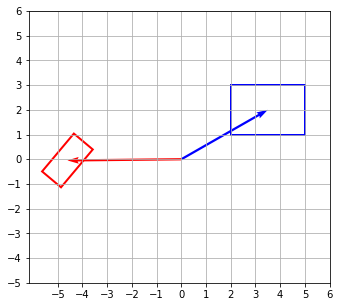

In [69]:
# a矩形坐标系下的两个矩形
bBase = np.array([iRotateA.dot(item) for item in b])

iAPos = iRotateA.dot(aPos)
iBPos = iRotateA.dot(bPos)

iAh = iRotateA.dot(ah)
iBh = iRotateA.dot(bh)

draw = Draw()
draw.v(iAPos, 'b')
draw.v(iBPos)
draw.rect(aBase, 'b')
draw.rect(bBase)
draw.render([-5, 7])

In [70]:
# 两个原点坐标的差
posTotal = abs(iBPos - iAPos)
posTotal

array([8.10951838, 2.0483767 ])

In [71]:
# 由于a矩形此刻是没有旋转的，所以a的半径向量直接可用
iAh

array([2.5, 1. ])

In [72]:
# b由于此刻是旋转的，所以b的半径向量需要重新算下
# 将变换矩阵取绝对值后点乘原来的半径向量得到的向量即是x,y的最大值
r = np.array([ [ abs(f) for f in item ] for item in iRotateA ])
rr = r.dot(bh)
rr

array([1.02580983, 1.08743825])

In [73]:
#  b矩形x,y的最大值
rrTmp = [ item * -1 for item in rr ]
rrTmp + iBPos

array([-5.63532821, -1.13581494])

In [74]:
# 可以和上方的值对比下
bBase

array([[-3.58370855,  0.39627394],
       [-4.86928377, -1.13581494],
       [-5.63532821, -0.49302733],
       [-4.34975299,  1.03906155],
       [ 0.        ,  0.        ]])

In [75]:
rTotal = np.array(abs(iAh)) +  np.array(abs(rr)) 
rTotal

array([3.52580983, 2.08743825])

In [76]:
# x,y不全为负，所以不碰撞
posTotal - rTotal

array([ 4.58370855, -0.03906155])